## Final Project Submission

Please fill out:
* Student name: Sabatino Chen
* Student pace: full time
* Scheduled project review date/time: 2/8/2019, 2pm eastern 
* Instructor name: Joe San Pietro
* Blog post URL: https://medium.com/@sabatinochen/the-importance-of-visuals-in-the-eda-process-d248c8a58a47


I will be exploring the King County housing data set using the OSEMN approach in order to find the most important features that highly incluences our target variable, 'price'. Along the way, I will also focus on some important questions about the data set in regards to how certain features relate to one another as well as to our target variable.

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Obtain the data

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Column Names and descriptions for Kings County Data Set
* **id** - Unique identifier for a house
* **dateDate** - Date house was sold
* **price** -  Price is prediction target
* **bedrooms** -  # of Bedrooms/House
* **bathrooms** -  # of Bathrooms/House
* **sqft_living** -  Square footage of the home
* **sqft_lot** -  Square footage of the lot
* **floors** -  # floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - #  of times house has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Year when house was built
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Scrub the data
For this step in the EDA process I will:

- Cast columns to the appropriate data types
- Identify and deal with null values appropriately
- Identify and deal with filler values appropiately
- Remove unnecessary columns

In [3]:
df.info()
print(len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
21597


In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Dealing with Null Values
Right away we can see that our data has some null values for the features: 'waterfront', 'view', and 'yr_renovated'.


<br>

In [3]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [4]:
# Possibly drop waterfront due to it having really rare occurences
df.waterfront.value_counts(normalize=True, dropna=False) 

 0.0    0.883225
NaN     0.110015
 1.0    0.006760
Name: waterfront, dtype: float64

In [5]:
df.waterfront.isna().sum() / len(df)

0.11001527989998611

In [6]:
df.waterfront.fillna(0.0, inplace=True)
df.waterfront = df.waterfront.astype(int)

<br>

For the 'waterfront' feature, about 11% of our data has null values.  This is small enough where it is probably safe to drop these rows, but I would rather assume that these 'nan' values mean that there is no water front view for these properties and instead of removing valuable data which is why I replaced the 'nan' values with 0s. This can also be supported by the fact that majority of the properties in our data set do not have water front views as shown in the feature's value counts. 
I will keep this feature as an integer for now in order to explore, but I will probably end up dropping this feature due to it having super rare occurences of having a waterfront at less than 1%.

<br>

In [7]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [8]:
# Also possibly drop
df.view.value_counts(normalize=True, dropna=False) 

 0.0    0.899292
 2.0    0.044312
 3.0    0.023522
 1.0    0.015280
 4.0    0.014678
NaN     0.002917
Name: view, dtype: float64

In [9]:
df.view.isna().sum() / len(df)

0.0029170718155299346

In [10]:
df.view.fillna(0.0, inplace=True)

In [11]:
df.view = df.view.astype(int)

<br>

Looking at the value counts for 'view', less than .05% of the data has null values which is I applied the same method from what I did with 'waterfront'. 
I also might end up dropping this feature as well since majority of the homes don't have any views.

<br>

In [12]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [13]:
df.yr_renovated.value_counts(normalize=True, dropna=False).head()

 0.0       0.787656
NaN        0.177895
 2014.0    0.003380
 2003.0    0.001435
 2013.0    0.001435
Name: yr_renovated, dtype: float64

In [14]:
df.yr_renovated.isna().sum() / len(df)

0.17789507802009538

In [15]:
df.yr_renovated.fillna(0.0, inplace=True)

In [16]:
df.yr_renovated = df.yr_renovated.astype(int)

In [17]:
# Maybe drop yr_renovated since only 3% of the homes have been renovated
len(df[df['yr_renovated']>0]) / len(df)

0.03444922905959161

<br>

Looking at 'yr_renovated', I decided to keep the data since dropping the rows with null values would lose about 17% of the data set.  I again went with the assumption that since majority of the houses had 0 renovations that I would fill the null values with 0s.  Also skewing these columns shouldn't have a significant effect on analysing the rest of the data that these rows contain.  I also made this column into integers for now to see scatter plots later.
Might also drop this column similar to waterfront and view.

<br>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(14), object(2)
memory usage: 3.5+ MB


## Dealing with fillers and Checking Data Types
Now that there aren't anymore null values, I will identify incorrect column types while checking for filler values.

<br>

In [21]:
for col in df.columns:
    print(f'-----------Column: {col}-----------')
    print(df[col].value_counts().head(10))
    print(df[col].dtype)

-----------Column: id-----------
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64
int64
-----------Column: date-----------
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
7/9/2014     121
4/28/2015    121
4/14/2015    121
4/22/2015    121
Name: date, dtype: int64
object
-----------Column: price-----------
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: price, dtype: int64
float64
-----------Column: bedrooms-----------
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64
int64
-----------Column: bathrooms-----------
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1

In [18]:
# Change 'date' to datetime
df.date = pd.to_datetime(df.date)

In [19]:
# Need to check why 'sqft_basement' is an object
df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [20]:
df.sqft_basement.value_counts()[1] / len(df)

0.021021438162707785

In [21]:
df.sqft_basement = df.sqft_basement.replace('?', 0.0)

In [22]:
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement = df.sqft_basement.astype(int)

In [91]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


# Explore the data
Now that the data is cleaned up a bit, I will begin EDA in order to investigate further the different relationships going on between the features and the target variable. I will aslo use visuals to look for outliers and to further scrub the data. The questions that I am looking to answer are:

- Where are the most expensive neighborhoods in King County?
- How do the features 'condition' and 'grade' effect 'price'?
- What is the trend like for prices of houses?

## Scatter Plots

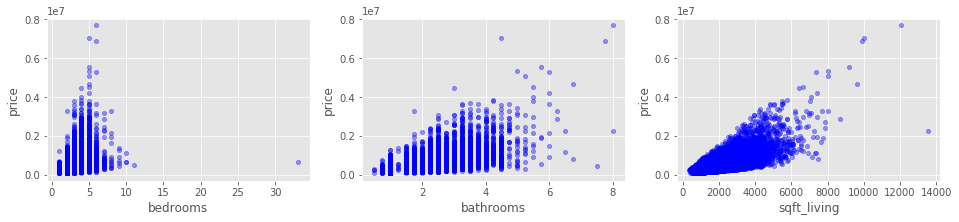

In [23]:
# create scatter plots to get a quick view of the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.columns)[3:], axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

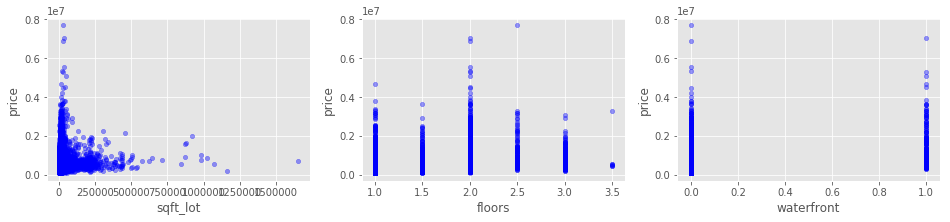

In [24]:
# create scatter plots to get a quick view of the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.columns)[6:], axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

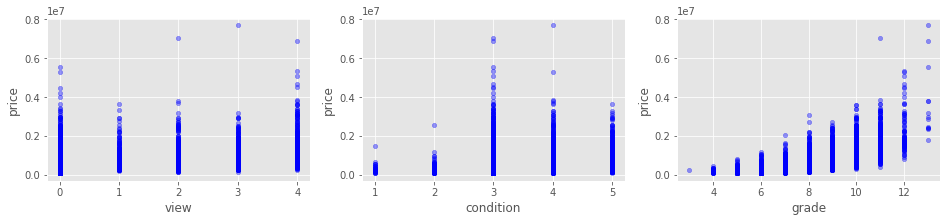

In [25]:
# create scatter plots to get a quick view of the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.columns)[9:], axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

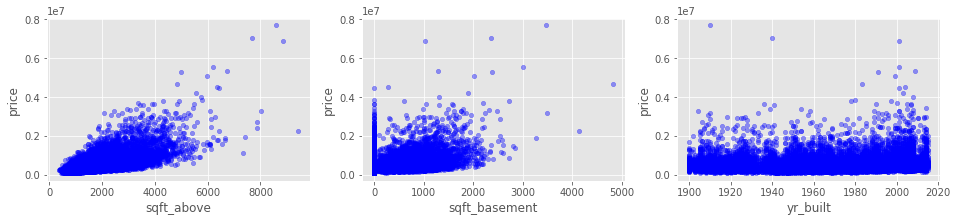

In [26]:
# create scatter plots to get a quick view of the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.columns)[12:], axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

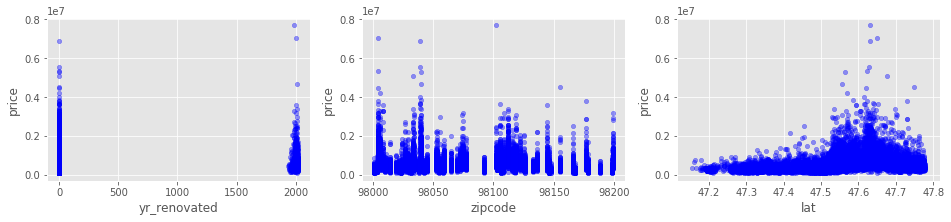

In [27]:
# create scatter plots to get a quick view of the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.columns)[15:], axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

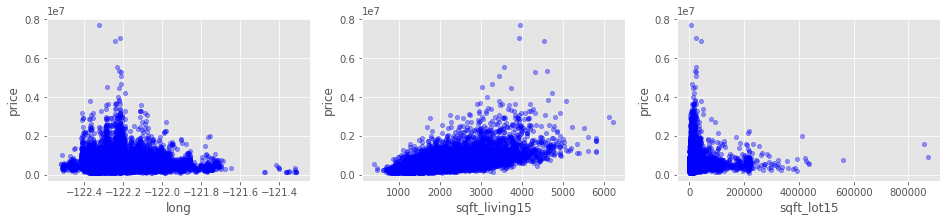

In [28]:
# create scatter plots to get a quick view of the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.columns)[18:], axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')

<br>

The scatter plots above really help to visualize the linearity of the different features with regards to price.  Right away we can see features that relate to size like sqft features, betrooms, bathrooms, have some linear relationship.  It's interesting that sqft_lot doesn't seem to have that relationship.  
The plots also show which features should probably be changed to categories for when we One_Hot encode like grade, condition, zipcode.  Below I will change the features to their proper types in order to investigate further.

<br>

In [29]:
# Change features that should be strings
to_str = ['id', 'zipcode', 'waterfront', 'yr_renovated']
df[to_str] = df[to_str].astype(str)

# Change 'yr_built' to datetime
df['yr_built']=pd.to_datetime(df['yr_built'], format = '%Y')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null object
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null datetime64[ns]
yr_renovated     21597 non-null object
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(10), object(4)
m

## Where are the most expensive neighborhoods in King County?

Let's take a look at how the most expensive neighborhoods in King County break down in terms of their average home price for each zipcode.  This could show very imporant information for those looking who are looking in different areas to buy or sell homes in King County.

In [475]:
# Create new df with 'price' and 'zipcode'
zip_df = df[['price', 'zipcode']]
zip_df.head()

,price,zipcode
0,221900.0,98178
1,538000.0,98125
2,180000.0,98028
3,604000.0,98136
4,510000.0,98074


In [476]:
# groups the zipcodes by their mean price from richest to poorest
zip_df.groupby('zipcode').mean().sort_values('price', ascending=False).head(10)

,price
zipcode,
98039,1.813537e+06
98004,1.274383e+06
98040,1.134777e+06
98112,1.063910e+06
98105,8.595797e+05
98109,8.585970e+05
98119,8.497148e+05
98102,8.186059e+05
98005,8.007751e+05


/Users/sabatinochen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


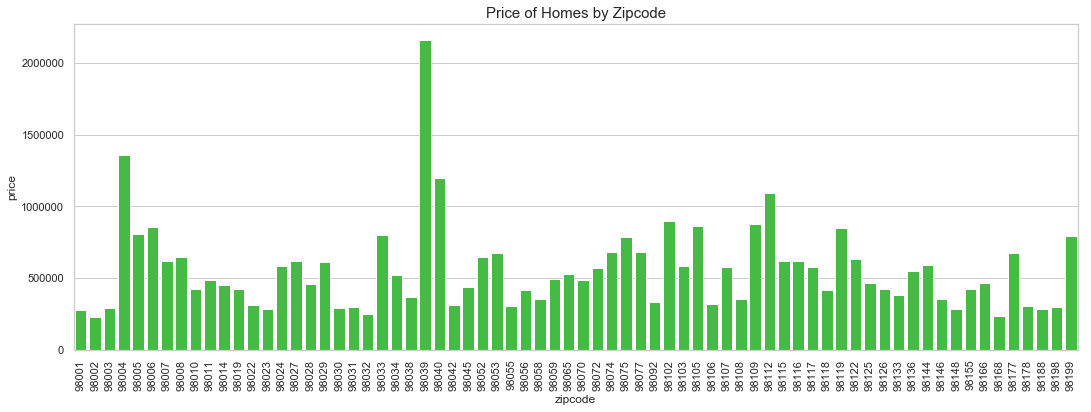

In [33]:
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(18, 6))

sns.barplot(x='zipcode', y='price', ci=False, data=zip_df, color='limegreen')

plt.title('Price of Homes by Zipcode', size=15)
plt.xticks(rotation = 90);

<br>

Here we can see the top 10 richest areas by their zipcode.  Each of these neighborhoods have a mean average house price of over $800,000. This also seems to suggest that zipcode as a dummy variable could be a good predictor of price. This could be good very useful information in order to maximize profit when selling a home.  It makes sense to see the prices homes in your area are being sold for.

<br>

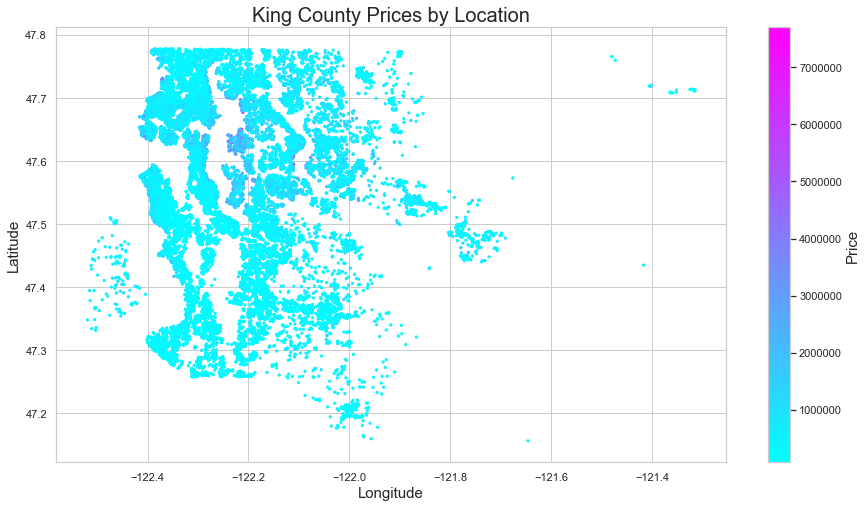

In [61]:
plt.figure(figsize = (15,8))
plt.scatter(df.long, df.lat ,c=df.price, cmap = 'cool', s=5)
plt.colorbar().set_label('Price', fontsize=15)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('King County Prices by Location', fontsize=20)
plt.show()

In [174]:
df[df['waterfront']=='1'].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1.516724e+06,3.270677,2.556391,2916.849624,22083.842105,1.620301,3.789474,3.548872,8.609023,2278.691729,629.887218,47.536492,-122.283045,2593.759398,22554.150376
std,8.732469e+05,1.066912,0.958720,1197.609636,20371.847864,0.550999,0.551206,0.763427,1.668944,993.673779,641.644852,0.114583,0.122948,748.454368,23251.337319
min,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.000000,1.000000,5.000000,440.000000,0.000000,47.327600,-122.512000,750.000000,3230.000000
25%,7.900000e+05,3.000000,1.750000,2040.000000,10756.000000,1.000000,4.000000,3.000000,7.000000,1550.000000,0.000000,47.450200,-122.378000,2030.000000,11852.000000
50%,1.360000e+06,3.000000,2.500000,2800.000000,16807.000000,2.000000,4.000000,3.000000,9.000000,2130.000000,460.000000,47.537900,-122.277000,2660.000000,15929.000000
75%,1.960000e+06,4.000000,3.250000,3750.000000,26211.000000,2.000000,4.000000,4.000000,10.000000,2860.000000,1190.000000,47.608300,-122.214000,3120.000000,24293.000000
max,3.650000e+06,6.000000,4.750000,5990.000000,167125.000000,3.000000,4.000000,5.000000,12.000000,4830.000000,2050.000000,47.772900,-122.059000,4230.000000,192268.000000


In [175]:
df[df['waterfront']=='0'].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.108000e+04,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000
mean,5.210028e+05,3.359583,2.091580,2037.690939,12207.922770,1.488496,0.199858,3.411195,7.619687,1752.752135,279.149241,47.560783,-122.215987,1961.440085,10571.842742
std,3.104166e+05,0.885020,0.734626,836.748782,22567.918998,0.539201,0.690113,0.650579,1.122085,764.498301,425.326318,0.138402,0.139188,649.907097,14945.199879
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.515000,460.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5000.000000,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.472275,-122.329000,1480.000000,5064.750000
50%,4.470000e+05,3.000000,2.250000,1900.000000,7512.500000,1.500000,0.000000,3.000000,7.000000,1550.000000,0.000000,47.572600,-122.234000,1820.000000,7559.500000
75%,6.300000e+05,4.000000,2.500000,2510.000000,10338.750000,2.000000,0.000000,4.000000,8.000000,2170.000000,540.000000,47.678725,-122.128000,2330.000000,9900.000000
max,3.800000e+06,8.000000,5.000000,5960.000000,344124.000000,3.500000,4.000000,5.000000,13.000000,5000.000000,2350.000000,47.777600,-121.315000,4495.000000,199069.000000


In [176]:
# Can see mean price is much larger for the small amount of homes with a waterfront.

In [477]:
df.waterfront.value_counts()

0    21080
1      133
Name: waterfront, dtype: int64

## How does 'grade' and 'condition' factor into 'price'?

Let's look a little deeper into how some of our ranking features, 'grade' and 'condition' factor into the overall price of homes.  

In [80]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [81]:
df.grade.unique()
[str(i) for i in list(range(3,14))]

['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

In [82]:
df.condition.unique()

array([3, 5, 4, 1, 2])

In [83]:
df_cat = df[['price', 'grade', 'condition']]
df_cat[['grade', 'condition']] = df_cat[['grade', 'condition']].astype(str)

/Users/sabatinochen/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


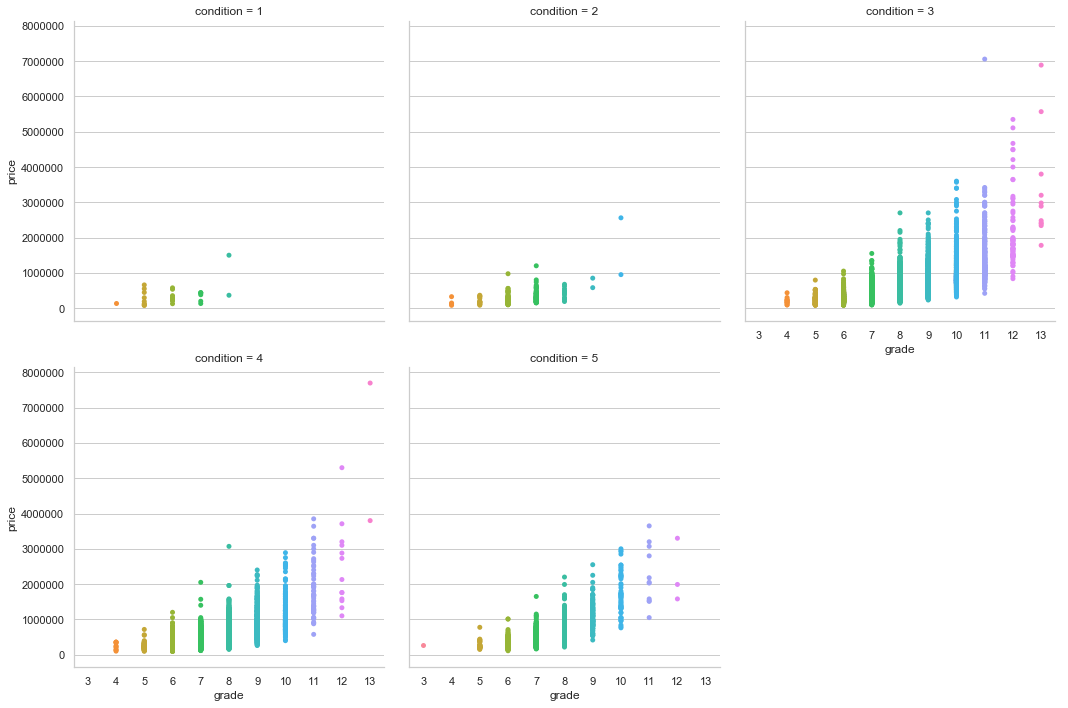

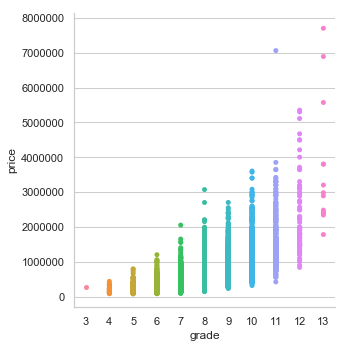

In [84]:
sns.catplot(x='grade', y='price', col='condition', col_wrap=3,
            jitter = False, order = [str(i) for i in list(range(3,14))],
            data=df_cat)
sns.catplot(x='grade', y='price', jitter = False, order = [str(i) for i in list(range(3,14))],
            data=df_cat);

<br>

The plots above show the relationship between the grade of the house and its price for each different condition. There seems to be a great distinction in homes with a condtion greater than 2. Almost no homes with a condtion of 2 or less receive grades higher than 8. For conditions of 3 or greater, the price seems to depend more on the grade rather than the condition since we can see many homes of condition 3 with higher prices and higher grades than homes with condition 5. This suggests there is a limit to the effect that condition has on price. Grade overall seems to have some positive linearity with price. 
This information can be useful homeowners looking to sell their home to maximize profit by knowing the certain thresholds of grade and condition to get an overall idea of what price you could sell your home for.

## What is the trend for homes being sold?

/Users/sabatinochen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


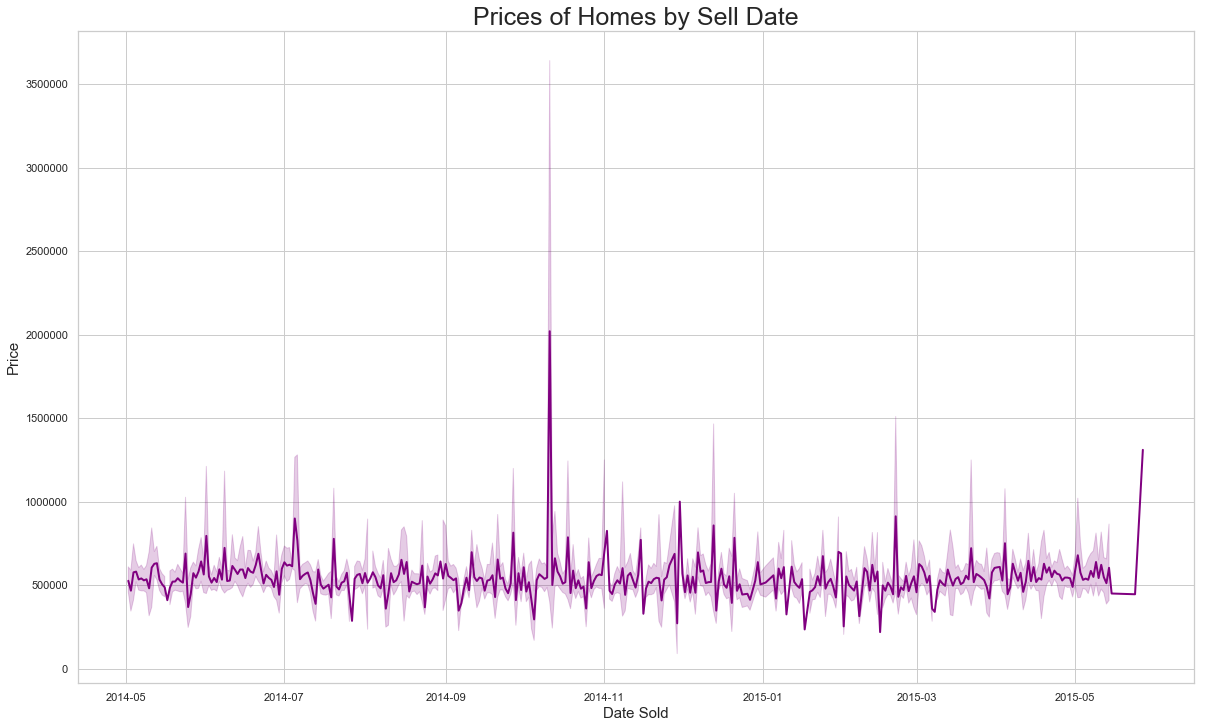

In [85]:
plt.figure(figsize = (20,12))
sns.lineplot(x="date",y="price", data = df, linewidth=2, color='purple');

plt.title('Prices of Homes by Sell Date', fontsize = 25)
plt.xlabel('Date Sold', fontsize = 15)
plt.ylabel('Price', fontsize = 15);

<br>

Here we can see the overall trend of the prices of the homes based on when they were sold.  With the exception of in the fall of 2014 it seems like the overall trend over the past 2 years have been pretty consistent.

<br>

/Users/sabatinochen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


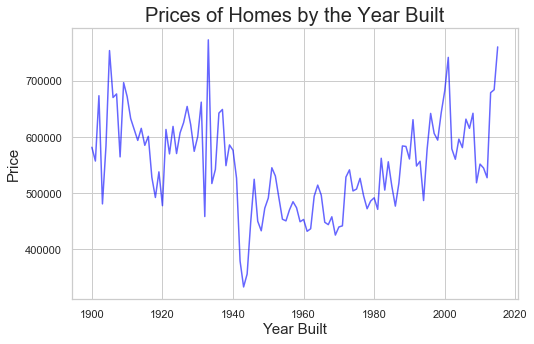

In [86]:
plt.figure(figsize = (8,5))
sns.lineplot(x="yr_built",y="price", data = df, color='blue', err_style=None, alpha=0.6);

plt.title('Prices of Homes by the Year Built', fontsize = 20)
plt.xlabel('Year Built', fontsize = 15)
plt.ylabel('Price', fontsize = 15);

<br>

Based on the chart above there is a huge decrease in price for homes built in the 1940's.  However after that date there seems to be a positive trend for price the newer the houses are.

<br>

In [87]:
df_renovated = df[df['yr_renovated']!= '0']
df_renovated['yr_renovated'] = df_renovated['yr_renovated'].astype(int)

/Users/sabatinochen/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/sabatinochen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


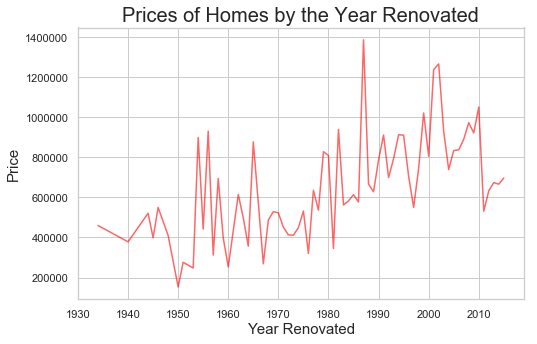

In [88]:
plt.figure(figsize = (8,5))
sns.lineplot(x="yr_renovated",y="price", data = df_renovated, color='red', err_style=None, alpha=0.6);

plt.title('Prices of Homes by the Year Renovated', fontsize = 20)
plt.xlabel('Year Renovated', fontsize = 15)
plt.ylabel('Price', fontsize = 15);

<br>

This chart shows a similar trend to the Year Built chart.  

Overall these visuals can give homeowners a good idea about the current trend of the market and give them a price range in terms of when there house was built or last renovated.

Now I will continue to look at the rest of the data with visuals to further scrub the data.

<br>

## Dealing with Outliers

In [89]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


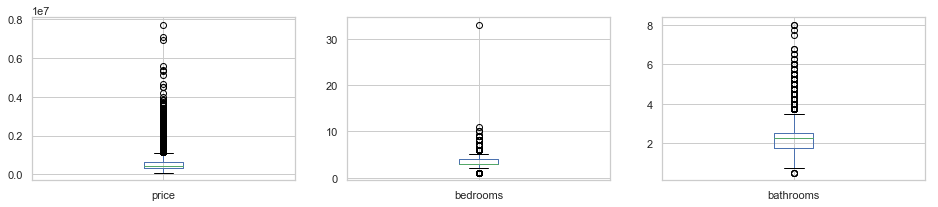

In [62]:
# create scatter plots to get a quick view of the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.describe().columns)[0:], axes):
    df.boxplot(column = col, ax=ax)

In [91]:
len(df[df['price'] > 3000000]) / len(df)

0.002083622725378525

In [63]:
# Less than 3 percent of the home prices are greater than $1.5 mill, can drop these and examine the scatter plots
df_clean = df.drop(df[df.price >3000000].index)

# Looking at the description and the scatters above helps to remove outliers
len(df[df['bedrooms'] > 8]) / len(df) # less than 1%
df.drop(df[df['bedrooms'] > 8].index, inplace=True)

len(df[df['bathrooms'] > 5]) / len(df) # less than 1%
df.drop(df[df['bathrooms'] > 5].index, inplace=True)

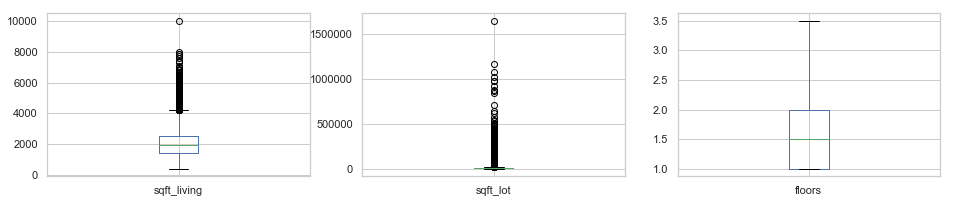

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.describe().columns)[3:], axes):
    df.boxplot(column = col, ax=ax)

In [65]:
len(df[df['sqft_living'] > 6000]) / len(df)
df.drop(df[df['sqft_living'] > 6000].index, inplace=True)

len(df[df['sqft_lot'] > 350000]) / len(df)
df.drop(df[df['sqft_lot'] > 350000].index, inplace=True)

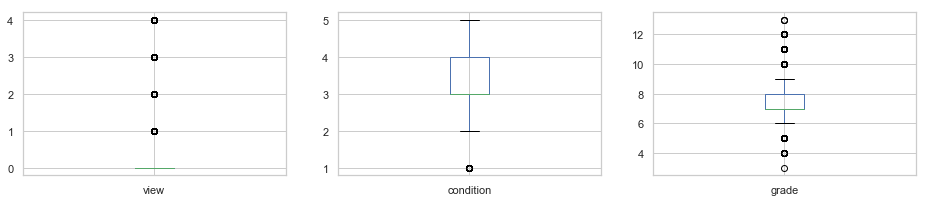

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.describe().columns)[6:], axes):
    df.boxplot(column = col, ax=ax)

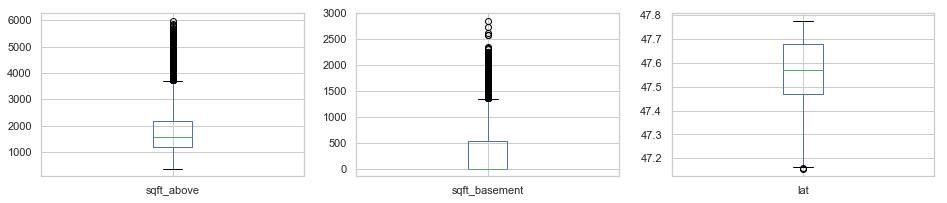

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.describe().columns)[9:], axes):
    df.boxplot(column = col, ax=ax)

In [68]:
len(df[df['sqft_above'] > 5000]) / len(df)
df.drop(df[df['sqft_above'] > 5000].index, inplace=True)

len(df[df['sqft_basement'] > 2500]) / len(df)
df.drop(df[df['sqft_basement'] > 2500].index, inplace=True)

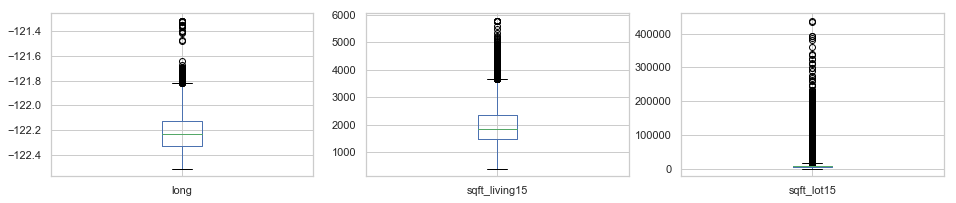

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for col, ax in zip(list(df.describe().columns)[12:], axes):
    df.boxplot(column = col, ax=ax)

In [70]:
len(df[df['sqft_living15'] > 4500]) / len(df) 
df.drop(df[df['sqft_living15'] > 4500].index, inplace=True)

len(df[df['sqft_lot15'] > 200000]) / len(df) 
df.drop(df[df['sqft_lot15'] > 200000].index, inplace=True)

In [71]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.121300e+04,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000
mean,5.272457e+05,3.359025,2.094494,2043.203036,12269.842219,1.489323,0.222364,3.412059,7.625890,1756.049639,281.348277,47.560630,-122.216408,1965.404563,10646.968698
std,3.266147e+05,0.886275,0.737128,842.318063,22567.849971,0.539363,0.745282,0.651417,1.128987,767.242455,427.898017,0.138277,0.139190,652.463089,15040.523944
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.515000,460.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5004.000000,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.472000,-122.330000,1480.000000,5080.000000
50%,4.499500e+05,3.000000,2.250000,1900.000000,7550.000000,1.500000,0.000000,3.000000,7.000000,1550.000000,0.000000,47.572200,-122.234000,1830.000000,7560.000000
75%,6.350000e+05,4.000000,2.500000,2520.000000,10403.000000,2.000000,0.000000,4.000000,8.000000,2180.000000,540.000000,47.678600,-122.129000,2340.000000,9938.000000
max,3.800000e+06,8.000000,5.000000,5990.000000,344124.000000,3.500000,4.000000,5.000000,13.000000,5000.000000,2350.000000,47.777600,-121.315000,4495.000000,199069.000000


<br>

Above I went through the numerical data looking for outliers. The extreme outliers might have been huge mansions, errors, or large buildings mistakenly classified as homes.  The removal of these outliers well help the model best represent the sample of the given price range that was kept.

<br>

## Checking for Multicollinearity

In [72]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.304128,0.492102,0.667808,0.087623,0.258272,0.394302,0.051107,0.659678,0.563864,0.299790,0.339914,0.008331,0.580063,0.084360
bedrooms,0.304128,1.000000,0.517099,0.601922,0.057794,0.174048,0.071620,0.027009,0.356625,0.491516,0.295356,-0.017127,0.140452,0.401971,0.056274
bathrooms,0.492102,0.517099,1.000000,0.738265,0.074392,0.506928,0.166501,-0.123358,0.648093,0.663124,0.258439,0.020495,0.220936,0.555772,0.072287
sqft_living,0.667808,0.601922,0.738265,1.000000,0.191277,0.353084,0.262196,-0.052163,0.748197,0.861078,0.416628,0.051598,0.238285,0.755227,0.196055
sqft_lot,0.087623,0.057794,0.074392,0.191277,1.000000,-0.044570,0.054756,0.000670,0.128057,0.195452,0.026075,-0.079746,0.251201,0.193497,0.752137
floors,0.258272,0.174048,0.506928,0.353084,-0.044570,1.000000,0.022384,-0.264083,0.458264,0.534569,-0.258455,0.047999,0.122405,0.274715,-0.055822
view,0.394302,0.071620,0.166501,0.262196,0.054756,0.022384,1.000000,0.047029,0.234517,0.141219,0.257904,0.014023,-0.093025,0.267706,0.059369
condition,0.051107,0.027009,-0.123358,-0.052163,0.000670,-0.264083,0.047029,1.000000,-0.143646,-0.159017,0.176282,-0.011982,-0.101670,-0.088206,0.018409
grade,0.659678,0.356625,0.648093,0.748197,0.128057,0.458264,0.234517,-0.143646,1.000000,0.739172,0.144704,0.115935,0.192008,0.700753,0.134996
sqft_above,0.563864,0.491516,0.663124,0.861078,0.195452,0.534569,0.141219,-0.159017,0.739172,1.000000,-0.095338,-0.005316,0.348293,0.725320,0.201588


In [73]:
abs(df.corr()) > 0.70

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False


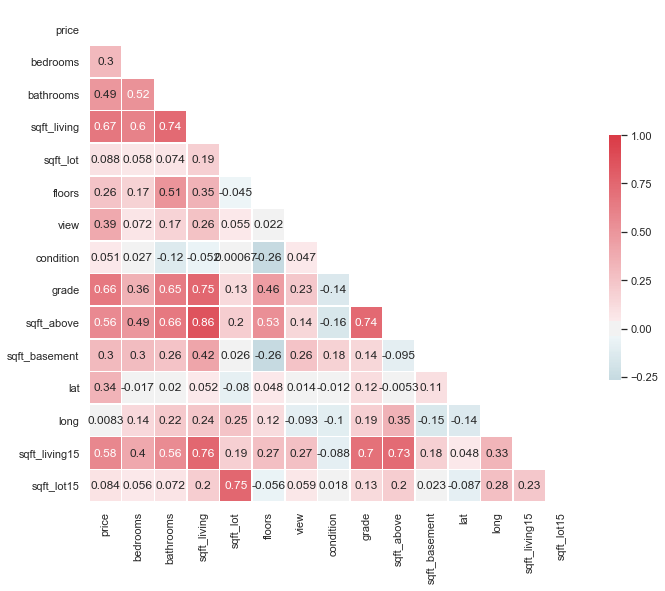

In [74]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

<br>

The correlation heatmap above shows that there are several features that have a correlation above 0.70 with several other features.  The highest correlations are between 'sqft_living', 'sqft_above', 'bathrooms', 'sqft_living15', and also between 'sqft_lot' and 'sqft_lot15'.  This makes sense since the more bathrooms there are the higher the square footage of the home should be.  Also the square footage of the home should be very similar to the square footage above (square footage apart from the basement). Since 'sqft_living' has the highest correlation with our target variable price I will keep that feature and drop the others.  I will also drop 'sqft_living15' and 'sqft_lot15' since the nearest 15 neighbors should be somewhat similar to index home.  

<br>

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21213 entries, 0 to 21596
Data columns (total 21 columns):
id               21213 non-null object
date             21213 non-null datetime64[ns]
price            21213 non-null float64
bedrooms         21213 non-null int64
bathrooms        21213 non-null float64
sqft_living      21213 non-null int64
sqft_lot         21213 non-null int64
floors           21213 non-null float64
waterfront       21213 non-null object
view             21213 non-null int64
condition        21213 non-null int64
grade            21213 non-null int64
sqft_above       21213 non-null int64
sqft_basement    21213 non-null int64
yr_built         21213 non-null datetime64[ns]
yr_renovated     21213 non-null object
zipcode          21213 non-null object
lat              21213 non-null float64
long             21213 non-null float64
sqft_living15    21213 non-null int64
sqft_lot15       21213 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(10), object(4)
m

## Drop Columns

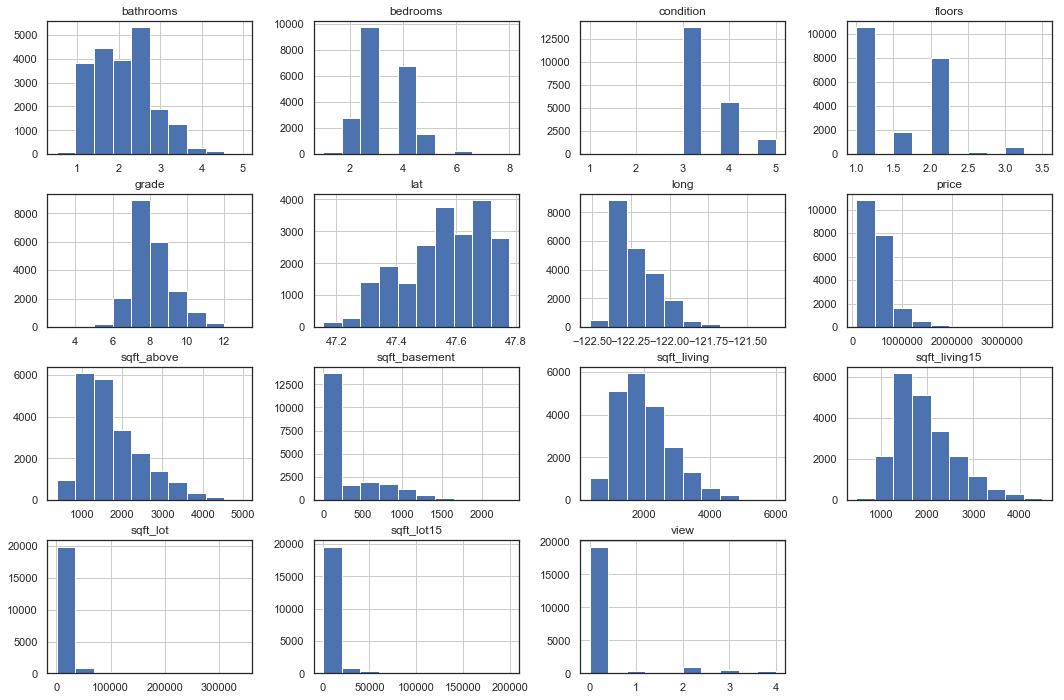

In [76]:
df.hist(figsize=(18,12));

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21213 entries, 0 to 21596
Data columns (total 21 columns):
id               21213 non-null object
date             21213 non-null datetime64[ns]
price            21213 non-null float64
bedrooms         21213 non-null int64
bathrooms        21213 non-null float64
sqft_living      21213 non-null int64
sqft_lot         21213 non-null int64
floors           21213 non-null float64
waterfront       21213 non-null object
view             21213 non-null int64
condition        21213 non-null int64
grade            21213 non-null int64
sqft_above       21213 non-null int64
sqft_basement    21213 non-null int64
yr_built         21213 non-null datetime64[ns]
yr_renovated     21213 non-null object
zipcode          21213 non-null object
lat              21213 non-null float64
long             21213 non-null float64
sqft_living15    21213 non-null int64
sqft_lot15       21213 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(10), object(4)
m

In [287]:
# Drop columns that aren't necessary and that affect multicollinearity and yr_renovated since majority of homes had 0
# Also dropping columns that have very rare occurences like waterfront, view, yr_renovated
df_clean = df.drop(df[['id', 'date', 'yr_built', 'bathrooms', 'sqft_above', 'sqft_lot15', 'sqft_living15',
                    'view', 'yr_renovated']], axis=1)


In [288]:
df_clean.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,zipcode,lat,long
0,221900.0,3,1180,5650,1.0,0,3,7,0,98178,47.5112,-122.257
1,538000.0,3,2570,7242,2.0,0,3,7,400,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0,3,6,0,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0,5,7,910,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0,3,8,0,98074,47.6168,-122.045


## Exploring More with Visuals

In [289]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21213 entries, 0 to 21596
Data columns (total 12 columns):
price            21213 non-null float64
bedrooms         21213 non-null int64
sqft_living      21213 non-null int64
sqft_lot         21213 non-null int64
floors           21213 non-null float64
waterfront       21213 non-null object
condition        21213 non-null int64
grade            21213 non-null int64
sqft_basement    21213 non-null int64
zipcode          21213 non-null object
lat              21213 non-null float64
long             21213 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 2.1+ MB


In [290]:
df_clean.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,lat,long
count,2.121300e+04,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000
mean,5.272457e+05,3.359025,2043.203036,12269.842219,1.489323,3.412059,7.625890,281.348277,47.560630,-122.216408
std,3.266147e+05,0.886275,842.318063,22567.849971,0.539363,0.651417,1.128987,427.898017,0.138277,0.139190
min,7.800000e+04,1.000000,370.000000,520.000000,1.000000,1.000000,3.000000,0.000000,47.155900,-122.515000
25%,3.200000e+05,3.000000,1420.000000,5004.000000,1.000000,3.000000,7.000000,0.000000,47.472000,-122.330000
50%,4.499500e+05,3.000000,1900.000000,7550.000000,1.500000,3.000000,7.000000,0.000000,47.572200,-122.234000
75%,6.350000e+05,4.000000,2520.000000,10403.000000,2.000000,4.000000,8.000000,540.000000,47.678600,-122.129000
max,3.800000e+06,8.000000,5990.000000,344124.000000,3.500000,5.000000,13.000000,2350.000000,47.777600,-121.315000


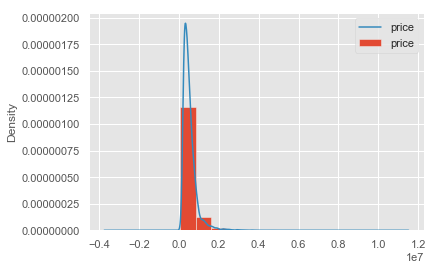

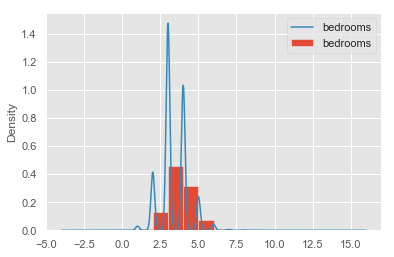

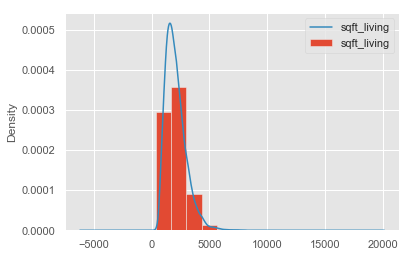

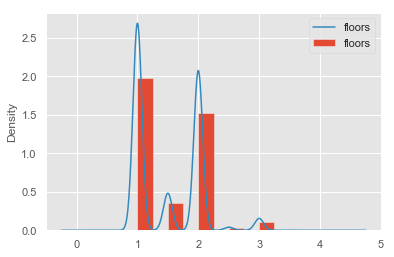

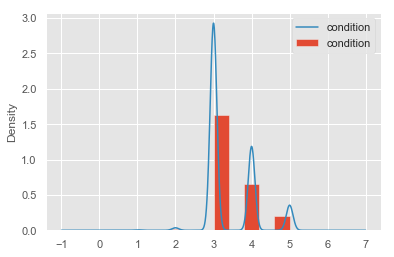

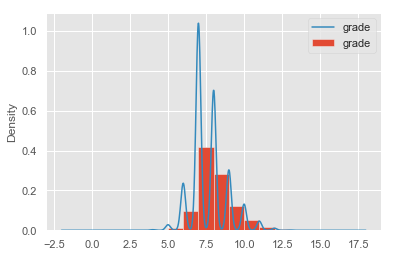

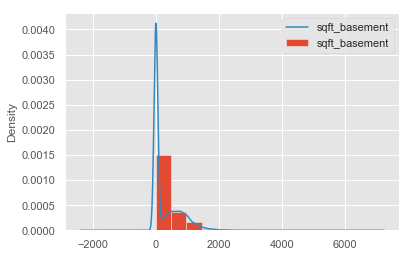

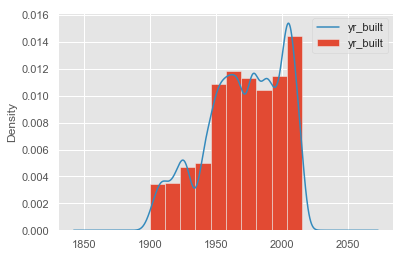

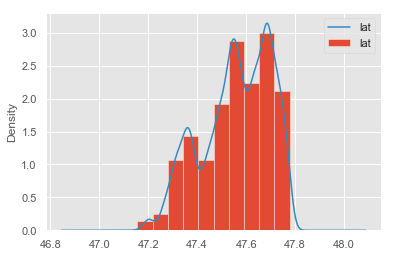

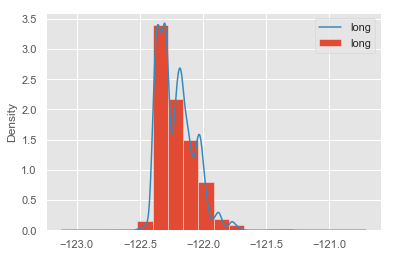

In [35]:
for column in df_clean.describe().columns:
    plt.style.use('ggplot')
    df_clean[column].plot.hist(density=True)
    df_clean[column].plot.kde(label=column)
    plt.legend()
    plt.show();

<br>

Some of the features are multimodal, the most normal looking distributions are price and sqft_lving, although they both have a slight skew. Sqft_basement is heavily skewed and might not be useful.  I will generate some joint plots to further investigate.

<br>

/Users/sabatinochen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


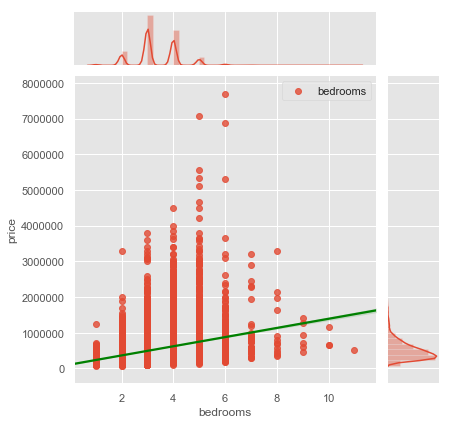

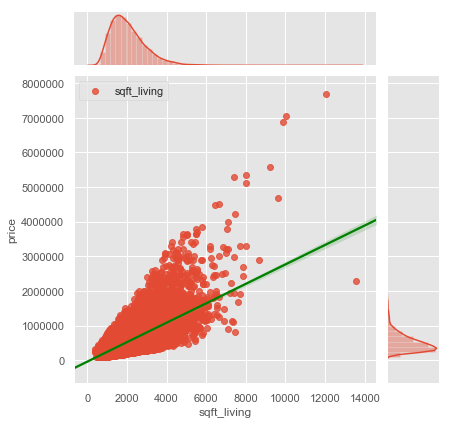

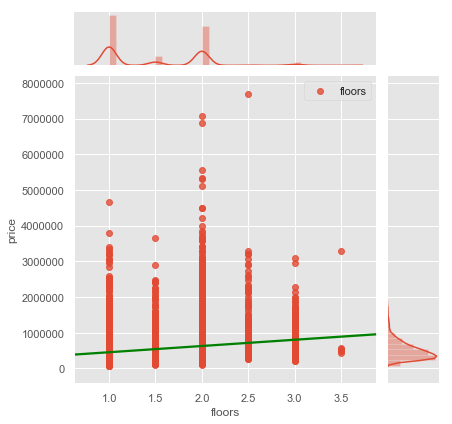

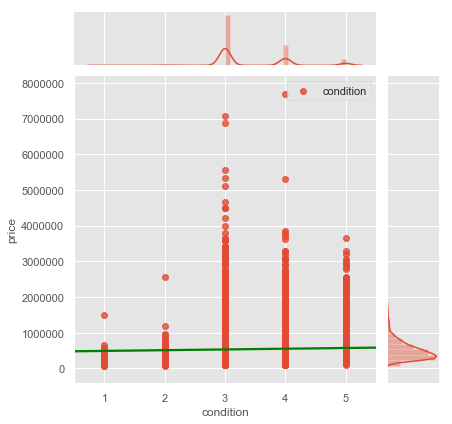

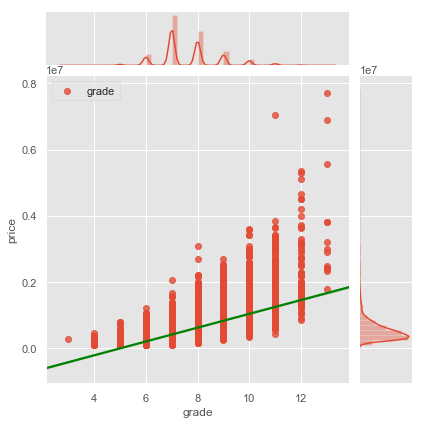

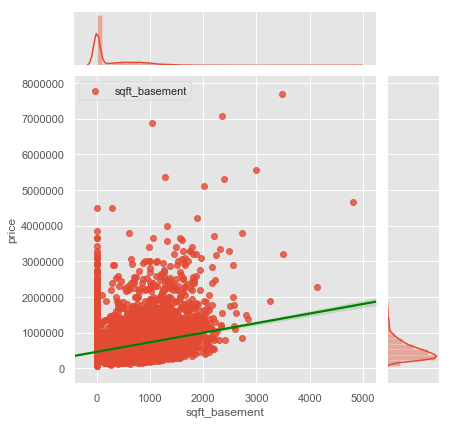

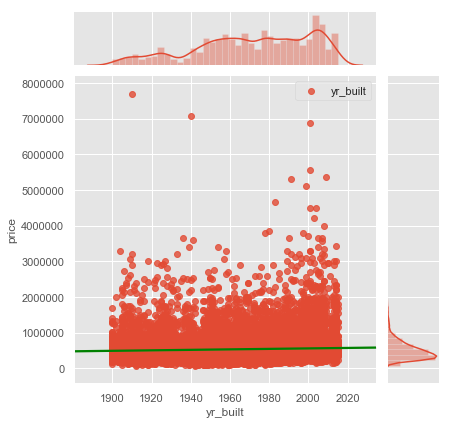

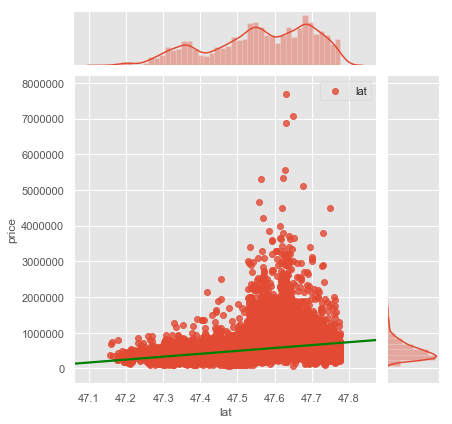

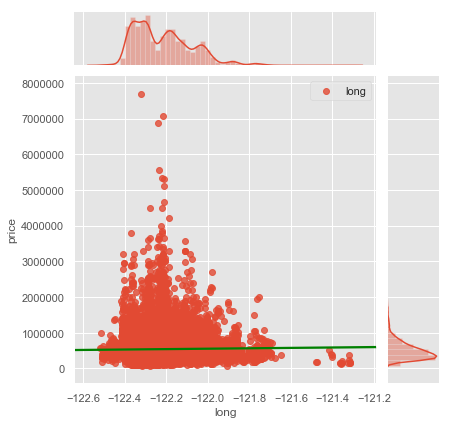

In [36]:
for column in df_clean.describe().columns[1:]:
    sns.jointplot(x=column, y='price',
                  data=df_clean, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws': {'color': 'green'}})
    plt.legend()
    plt.show()

<br>

The joint plots do a good job at showing the linear relationship along with the distributions of the features with relation to price. Most of the features have some positve relationship with price.  Longitude and sqft_lot have a slight negative relationship. Sqft_living seems to have the strongest relationship.

<br>

## Scale Data

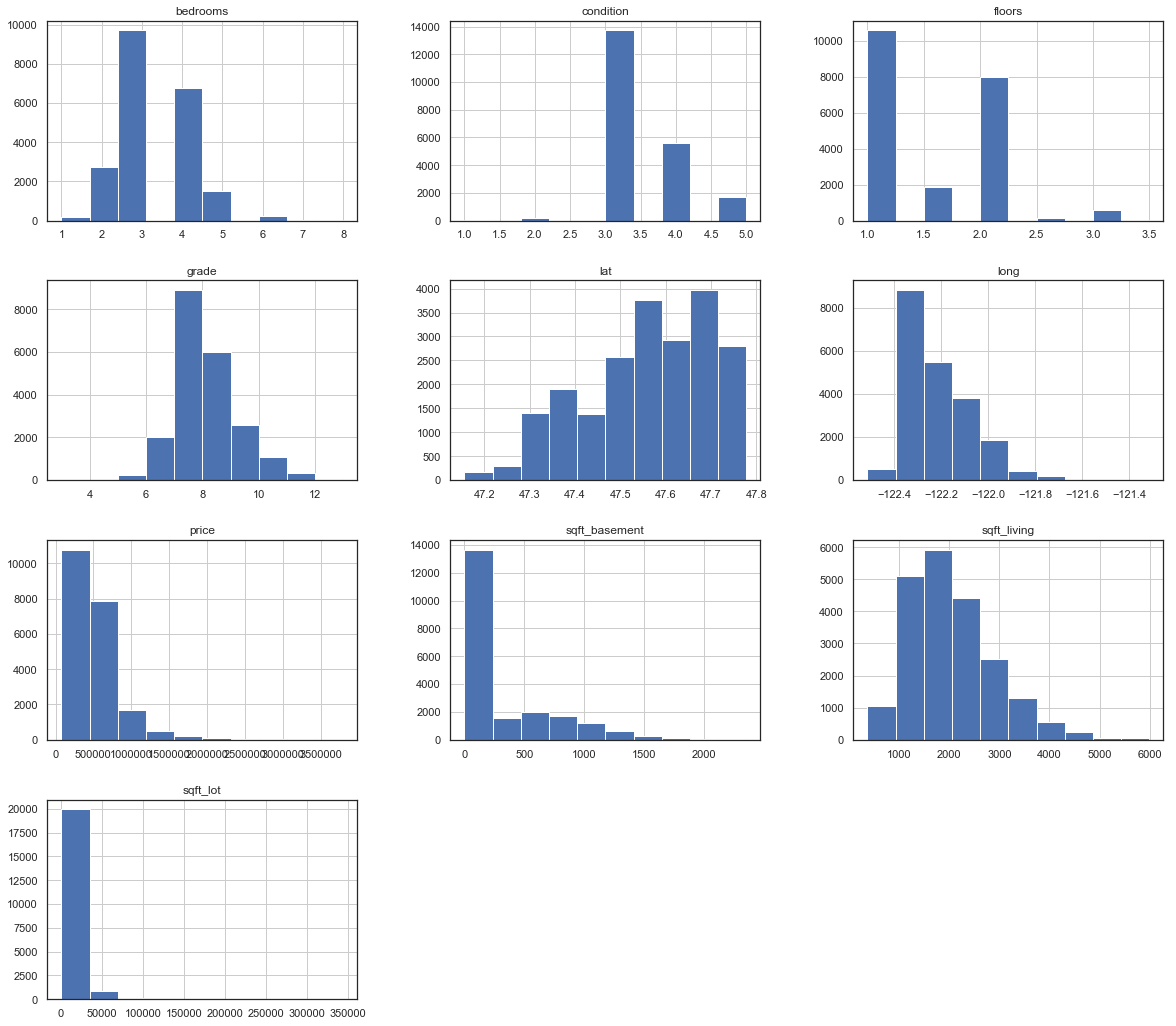

In [180]:
df_clean.hist(figsize=(20,18));

In [34]:
df_clean.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built,zipcode,...,long_-121.40299999999999,long_-121.402,long_-121.36399999999999,long_-121.359,long_-121.352,long_-121.325,long_-121.321,long_-121.319,long_-121.316,long_-121.315
count,2.159600e+04,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2080.343165,1.509983e+04,1.494119,3.409752,7.657946,285.702954,1971.000787,98077.950685,...,0.000046,0.000046,0.000093,0.000046,0.000093,0.000046,0.000046,0.000046,0.000046,0.000093
std,3.673760e+05,0.904114,918.122038,4.141355e+04,0.539685,0.650471,1.173218,439.825454,29.375460,53.514040,...,0.006805,0.006805,0.009623,0.006805,0.009623,0.006805,0.006805,0.006805,0.006805,0.009623
min,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,0.000000,1900.000000,98001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,0.000000,1951.000000,98033.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,1910.000000,7.619000e+03,1.500000,3.000000,7.000000,0.000000,1975.000000,98065.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2550.000000,1.068550e+04,2.000000,4.000000,8.000000,550.000000,1997.000000,98118.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,11.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,4820.000000,2015.000000,98199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [408]:
# can log transform 'price'
df_log = df_clean.copy()
for col in ['price', 'sqft_living']:
    df_log[col] = np.log(df_log[col])

In [409]:
df_log.describe().columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'grade', 'sqft_basement', 'lat', 'long'],
      dtype='object')

In [410]:
# can feature scaling should be used to get all features on same scale, will use min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_log[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'grade', 'sqft_basement', 'lat', 'long']] = scaler.fit_transform(
    df_log[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'grade', 'sqft_basement', 'lat', 'long']])

/Users/sabatinochen/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## One-Hot Encoding Categorical Columns

In [411]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21213 entries, 0 to 21596
Data columns (total 12 columns):
price            21213 non-null float64
bedrooms         21213 non-null float64
sqft_living      21213 non-null float64
sqft_lot         21213 non-null float64
floors           21213 non-null float64
waterfront       21213 non-null object
condition        21213 non-null float64
grade            21213 non-null float64
sqft_basement    21213 non-null float64
zipcode          21213 non-null object
lat              21213 non-null float64
long             21213 non-null float64
dtypes: float64(10), object(2)
memory usage: 2.1+ MB


In [412]:
# drop the first column for each dummy category
df_log = pd.get_dummies(df_log, drop_first=True)

# Modeling the Data

In [413]:
df_log.columns[10:]

Index(['waterfront_1', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'z

In [414]:
for cat in df_log.iloc[:,10:].columns:
         df_log[cat] = df_log[cat].astype('category')

In [415]:
df_log.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,lat,long
count,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000,21213.000000
mean,0.455641,0.337004,0.583808,0.034196,0.195729,0.603015,0.462589,0.119723,0.651006,0.248827
std,0.131977,0.126611,0.148199,0.065680,0.215745,0.162854,0.112899,0.182084,0.222417,0.115992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.363251,0.285714,0.483026,0.013050,0.000000,0.500000,0.400000,0.000000,0.508445,0.154167
50%,0.450954,0.285714,0.587609,0.020460,0.200000,0.500000,0.400000,0.000000,0.669616,0.234167
75%,0.539601,0.428571,0.689035,0.028763,0.400000,0.750000,0.500000,0.229787,0.840759,0.321667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [416]:
import statsmodels.formula.api as smf

col_names = df_log.describe().columns.drop(['price'])
results_log = [['Target_variable', 'R_squared', 'intercept', 'slope', 'p_value']]
for idx, val in enumerate(col_names):
    print('Housing: price~' + val)
    print('-----------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_log).fit()
    X_new = pd.DataFrame({val: [df_log[val].min(), df_log[val].max()]})
    preds = model.predict(X_new)
    results_log.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results_log[idx+1])

Housing: price~bedrooms
-----------------------------
['bedrooms', 0.11310086590092638, 0.3375013849414287, 0.35055826400902407, 0.0]
Housing: price~sqft_living
-----------------------------
['sqft_living', 0.4302823708741337, 0.11460499177985475, 0.5841569587333528, 0.0]
Housing: price~sqft_lot
-----------------------------
['sqft_lot', 0.009315808581060514, 0.4490086988258307, 0.19394379652856056, 4.395478323388723e-45]
Housing: price~floors
-----------------------------
['floors', 0.09147955361398719, 0.41942700040127195, 0.18501995879064098, 0.0]
Housing: price~condition
-----------------------------
['condition', 0.0023298095854226153, 0.43205303558706143, 0.03911636676002882, 2.0100989951716833e-12]
Housing: price~grade
-----------------------------
['grade', 0.46983241715080404, 0.08498102999402811, 0.8012723291939605, 0.0]
Housing: price~sqft_basement
-----------------------------
['sqft_basement', 0.0897688619678434, 0.4296413117555564, 0.21716410296261307, 0.0]
Housing: price

In [417]:
pd.DataFrame(results_log)

,0,1,2,3,4
0,Target_variable,R_squared,intercept,slope,p_value
1,bedrooms,0.113101,0.337501,0.350558,0
2,sqft_living,0.430282,0.114605,0.584157,0
3,sqft_lot,0.00931581,0.449009,0.193944,4.39548e-45
4,floors,0.0914796,0.419427,0.18502,0
5,condition,0.00232981,0.432053,0.0391164,2.0101e-12
6,grade,0.469832,0.084981,0.801272,0
7,sqft_basement,0.0897689,0.429641,0.217164,0
8,lat,0.215873,0.276162,0.275695,0
9,long,0.00138555,0.445102,0.0423526,5.86188e-08


<br>

Our results clearly shows us that R_squared is the highest with the sqft_living feature.  All of the p_values are below 0.05 meaning there is some level of significance.  How ever since some of the R_squared values are low I will try improving them with log transformation.

<br>

In [418]:
df_log.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21213 entries, 0 to 21596
Data columns (total 80 columns):
price            21213 non-null float64
bedrooms         21213 non-null float64
sqft_living      21213 non-null float64
sqft_lot         21213 non-null float64
floors           21213 non-null float64
condition        21213 non-null float64
grade            21213 non-null float64
sqft_basement    21213 non-null float64
lat              21213 non-null float64
long             21213 non-null float64
waterfront_1     21213 non-null category
zipcode_98002    21213 non-null category
zipcode_98003    21213 non-null category
zipcode_98004    21213 non-null category
zipcode_98005    21213 non-null category
zipcode_98006    21213 non-null category
zipcode_98007    21213 non-null category
zipcode_98008    21213 non-null category
zipcode_98010    21213 non-null category
zipcode_98011    21213 non-null category
zipcode_98014    21213 non-null category
zipcode_98019    21213 non-null category

In [419]:
cols_zipcode = [column for column in df_log.columns if 'zipcode' in column]
cols_waterfront = [column for column in df_log.columns if 'waterfront' in column]

cols = [cols_zipcode, cols_waterfront]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'price~' + sum_cols
    model = smf.ols(formula=f, data=df_log).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     359.2
Date:                Mon, 11 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:20:26   Log-Likelihood:                 21088.
No. Observations:               21213   AIC:                        -4.204e+04
Df Residuals:                   21143   BIC:                        -4.148e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3153      0

<br>

The models with the categorical features seems to show that the log transformation increase the R_squared value for zipcode. For now I will stick with df_log.

## Drop Columns Based on Findings

In [434]:
# Drop features that had R_squared < 0.01 and datetime features or no correlation to target variable.
df_final = df_log.drop(['sqft_lot', 'long', 'condition', 'floors'], axis=1)
#df_final = df_final.drop(df_final[cols_zipcode], axis=1)

df_final.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21213 entries, 0 to 21596
Data columns (total 76 columns):
price            21213 non-null float64
bedrooms         21213 non-null float64
sqft_living      21213 non-null float64
grade            21213 non-null float64
sqft_basement    21213 non-null float64
lat              21213 non-null float64
waterfront_1     21213 non-null category
zipcode_98002    21213 non-null category
zipcode_98003    21213 non-null category
zipcode_98004    21213 non-null category
zipcode_98005    21213 non-null category
zipcode_98006    21213 non-null category
zipcode_98007    21213 non-null category
zipcode_98008    21213 non-null category
zipcode_98010    21213 non-null category
zipcode_98011    21213 non-null category
zipcode_98014    21213 non-null category
zipcode_98019    21213 non-null category
zipcode_98022    21213 non-null category
zipcode_98023    21213 non-null category
zipcode_98024    21213 non-null category
zipcode_98027    21213 non-null cate

## Feature Ranking with Recursive Feature Elimination

In [435]:
y = df_final[['price']].values # This fixes the string price being printed below
X = df_final.drop(['price'], axis=1)
X.head()

,bedrooms,sqft_living,grade,sqft_basement,lat,waterfront_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.285714,0.416531,0.4,0.000000,0.571498,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.285714,0.696092,0.4,0.170213,0.908959,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.142857,0.263217,0.3,0.000000,0.936143,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.428571,0.598775,0.4,0.387234,0.586939,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.285714,0.543412,0.5,0.000000,0.741354,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [436]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

r_list = []
adj_r_list = []
list_n = list(range(5, 86, 10))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_]
    linreg.fit(X[selected_columns], y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual)/SS_Total)
    print(r_squared)
    adjusted_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

0.702402495649407
0.7013465362972617
0.7690389886633096
0.7682194742643763
0.8142386891440225
0.8135795559503717
0.8322925806847117
0.8316975077581541
0.8459304852278241
0.8453838034088378
0.8506903674761757
0.8501605750534437
0.8519311448632632
0.8514057550664492
0.8522511406970246
0.8517268863351131
0.8522511406970246
0.8517268863351131


<br>
The difference between  𝑅2  and adjusted  𝑅2  is negligible, and seems to continue going up as we include more features. Remember though that we're likely overfitting when including 85 features. In order to identify this, let's rerun a similar experiment, but using a train test split.

## Train Test Split

In [437]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

MSE_train = []
MSE_test = []
list_n = list(range(5, 86, 10))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_]
    linreg.fit(X_train[selected_columns], y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_train.append(mse_train)
MSE_test.append(mse_test)

0.005212741481339169
0.005068030965248076
0.00403987385230266
0.003958085366315762
0.00328456225601645
0.003229765214187675
0.002888580307844626
0.00287006233997378
0.002684275168999697
0.0026900092960768576
0.0026083060489276127
0.002601828345625016
0.002581162815123512
0.002583938468808751
0.0025759216144745304
0.0025775640939728604
0.0025759216144745304
0.0025775640939728604


## 10-fold cross validation with the final model

Now I will run cross validation to make sure our model isn't overfitting.

In [438]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

select = RFE(linreg, n_features_to_select = 65)
select = select.fit(X, np.ravel(y))
selected_columns = X.columns[select.support_]



cv_results_10 = cross_val_score(linreg, X[selected_columns], y, cv=5, scoring='r2')
cv_results_10

array([0.84846925, 0.84340299, 0.84669869, 0.85548576, 0.85222877])

In [439]:
np.mean(cv_results_10)

0.8492570944740347

In [440]:
import statsmodels.api as sm

X_fin = X[selected_columns].astype(float)
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1872.
Date:                Mon, 11 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:27:01   Log-Likelihood:                 33119.
No. Observations:               21213   AIC:                        -6.611e+04
Df Residuals:                   21147   BIC:                        -6.558e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0299      0.003     -8.979      0.000      -0.036      -0.023
bedrooms         -0.0289      0.004     -7.762      0.000      -0.036      -0.022
sqft_living       0.3981      0.005     81.788      0.000       0.389       0.408
grade             0.2680      0.005     52.876      0.000       0.258       0.278
sqft_basement    -0.0136      0.002     -5.774      0.000      -0.018      -0.009
lat               0.0857      0.008     11.394      0.000       0.071       0.100
waterfront_1      0.1872      0.005     41.273      0.000       0.178       0.196
zipcode_98004     0.2510      0.004     58.514      0.000       0.243       0.259
zipcode_98005     0.1514      0.005     30.236      0.000       0.142       0.161
zipcode_98006     0.1389      0.003     40.317      0.000       0.132       0.146
zipcode_98007     0.1219      0.005     23.185      0.000       0.112       0.132
zipcode_98008     0.1270      0.004     29.439      0.000       0.119       0.135
zipcode_98010     0.0680      0.005     12.597      0.000       0.057       0.079
zipcode_98011     0.0460      0.006      7.692      0.000       0.034       0.058
zipcode_98014     0.0298      0.006      4.700      0.000       0.017       0.042
zipcode_98019     0.0160      0.006      2.674      0.007       0.004       0.028
zipcode_98022     0.0343      0.004      8.189      0.000       0.026       0.042
zipcode_98023    -0.0138      0.003     -5.354      0.000      -0.019      -0.009
zipcode_98024     0.0863      0.007     12.602      0.000       0.073       0.100
zipcode_98027     0.1006      0.003     30.688      0.000       0.094       0.107
zipcode_98028     0.0397      0.006      7.069      0.000       0.029       0.051
zipcode_98029     0.1056      0.004     27.849      0.000       0.098       0.113
zipcode_98032    -0.0189      0.005     -4.064      0.000      -0.028      -0.010
zipcode_98033     0.1508      0.005     32.994      0.000       0.142       0.160
zipcode_98034     0.0774      0.005     16.028      0.000       0.068       0.087
zipcode_98038     0.0260      0.002     11.205      0.000       0.021       0.031
zipcode_98039     0.3008      0.009     34.961      0.000       0.284       0.318
zipcode_98040     0.2073      0.004     51.855      0.000       0.199       0.215
zipcode_98045     0.0607      0.004     15.824      0.000       0.053       0.068
zipcode_98052     0.1049      0.004     23.770      0.000       0.096       0.114
zipcode_98053     0.0955      0.005     20.348      0.000       0.086       0.105
zipcode_98056     0.0539      0.003     17.094      0.000       0.048       0.060
zipcode_98058     0.0178      0.003      6.538      0.000       0.012       0.023
zipcode_98059     0.0575      0.003     19.466      0.000       0.052       0.063
zipcode_98065     0.0697      0.004     19.080   

# Conclusion

The final model produced an R_squared value of 0.838, this means that about 84% of the variance in price can be explained by the final regression model. The model also tested and trained using cross validation with 5 folds which showed consistent R_squared and MSE values. Also all of the model's features had p_values less than 0.05 meaning that they have significance in relation to price. 

The coefficients that were included in the final model were for 'sqft_living', 'grade', and 'zipcode'.  
'sqft_living' had a coefficient of 0.5153.  Since both the feature and the target value were log transformed, this coefficient means that for every 1% increase in 'sqft_living' leads to about a half % increase in price.  The coefficient for 'grade' is 0.1123.  Since grade wasn't log transformed, but price was, this means that for each increase in grade leads to almost a 11% increase in price.  The dummy category 'zipcode' also wasn't log transformed and there for we can interpret the coefficients as such: If your house is in zipcode 98004(coefficient of 1.119), then the model predicts an increase in price of 111%.  This falls in line with our EDA on the most expensive zipcodes in King County with zipcode 98004 having the second highest price mean among the rest of the zipcodes.

My overall approach to this project was using the OSEMN framework.  After obtaining the data it was obvious that there were null values, outliers, fillers, and incorrect feature types.  Then after the initial scrubbing I started EDA with visuals in order to investigate further the 3 questions I had about the data.  Further exploring allowed me to scrub the data more with transformations and dropping unimportant features.  Once I had my final data set to model I ran RFE to fit the best features for my model.

Initially, my models were giving me good R_squared values but really poor MSE and cross validation scores.  This led me to believe that my modes(then with 85 features) was overfitting.  I then tried changing certaing features such as grade and condition to numerical data instead of categorial data.  I also went back and filtered more for outliers. This helped with the overfitting and led to the final model.  

## Model Binning Zip code dummy variable

In [321]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21213 entries, 0 to 21596
Data columns (total 12 columns):
price            21213 non-null float64
bedrooms         21213 non-null int64
sqft_living      21213 non-null int64
sqft_lot         21213 non-null int64
floors           21213 non-null float64
waterfront       21213 non-null object
condition        21213 non-null int64
grade            21213 non-null int64
sqft_basement    21213 non-null int64
zipcode          21213 non-null object
lat              21213 non-null float64
long             21213 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 2.1+ MB


In [441]:
df_2 = df_clean.copy()

In [442]:
for col in ['price', 'sqft_living']:
    df_2[col] = np.log(df_2[col])

In [443]:
df_2.describe().columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'grade', 'sqft_basement', 'lat', 'long'],
      dtype='object')

In [444]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_2[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'grade', 'sqft_basement', 'lat', 'long']] = scaler.fit_transform(
    df_2[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition',
       'grade', 'sqft_basement', 'lat', 'long']])

/Users/sabatinochen/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [445]:
df_2.zipcode = df_2.zipcode.astype(int)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21213 entries, 0 to 21596
Data columns (total 12 columns):
price            21213 non-null float64
bedrooms         21213 non-null float64
sqft_living      21213 non-null float64
sqft_lot         21213 non-null float64
floors           21213 non-null float64
waterfront       21213 non-null object
condition        21213 non-null float64
grade            21213 non-null float64
sqft_basement    21213 non-null float64
zipcode          21213 non-null int64
lat              21213 non-null float64
long             21213 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 2.1+ MB


In [446]:
df_2 = df_2.drop(['sqft_lot', 'long', 'condition'], axis=1)

In [447]:
np.sort(df_2.zipcode.unique())

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199])

In [448]:
zipcode_bins = pd.cut(df_2['zipcode'], bins=10, labels=['98001-98020', '98021-98040', '98041-98060', '98061-98080', '98081-98100', '98101-98119', '98120-98139', '98140-98159', '98160-98179', '98180-98199'])
zipcode_bins = zipcode_bins.cat.as_unordered()
df_2['zipcode'] = zipcode_bins

In [449]:
df_2 = pd.get_dummies(df_2, drop_first=True)
df_2

,price,bedrooms,sqft_living,floors,grade,sqft_basement,lat,waterfront_1,zipcode_98021-98040,zipcode_98041-98060,zipcode_98061-98080,zipcode_98081-98100,zipcode_98101-98119,zipcode_98120-98139,zipcode_98140-98159,zipcode_98160-98179,zipcode_98180-98199
0,0.269044,0.285714,0.416531,0.0,0.4,0.000000,0.571498,0,0,0,0,0,0,0,0,1,0
1,0.496944,0.285714,0.696092,0.4,0.4,0.170213,0.908959,0,0,0,0,0,0,1,0,0,0
2,0.215192,0.142857,0.263217,0.0,0.3,0.000000,0.936143,0,1,0,0,0,0,0,0,0,0
3,0.526722,0.428571,0.598775,0.0,0.4,0.387234,0.586939,0,0,0,0,0,0,1,0,0,0
4,0.483191,0.285714,0.543412,0.0,0.5,0.000000,0.741354,0,0,0,1,0,0,0,0,0,0
6,0.307333,0.285714,0.550818,0.4,0.4,0.000000,0.247386,0,0,0,0,0,0,0,0,0,0
7,0.339556,0.285714,0.378014,0.0,0.4,0.000000,0.407914,0,0,0,0,0,0,0,0,0,1
8,0.277710,0.285714,0.564178,0.0,0.4,0.310638,0.573267,0,0,0,0,0,0,0,1,0,0
9,0.365653,0.285714,0.585714,0.4,0.4,0.000000,0.341805,0,1,0,0,0,0,0,0,0,0
10,0.550511,0.285714,0.813123,0.0,0.5,0.723404,0.715458,0,0,0,0,0,0,0,0,0,0


In [450]:
# Drop due to high p_value after running OLS below
df_final2 = df_2.drop(['floors'], axis=1)

In [451]:
y = df_final2[['price']].values # This fixes the string price being printed below
X = df_final2.drop(['price'], axis=1)
X.head()

,bedrooms,sqft_living,grade,sqft_basement,lat,waterfront_1,zipcode_98021-98040,zipcode_98041-98060,zipcode_98061-98080,zipcode_98081-98100,zipcode_98101-98119,zipcode_98120-98139,zipcode_98140-98159,zipcode_98160-98179,zipcode_98180-98199
0,0.285714,0.416531,0.4,0.000000,0.571498,0,0,0,0,0,0,0,0,1,0
1,0.285714,0.696092,0.4,0.170213,0.908959,0,0,0,0,0,0,1,0,0,0
2,0.142857,0.263217,0.3,0.000000,0.936143,0,1,0,0,0,0,0,0,0,0
3,0.428571,0.598775,0.4,0.387234,0.586939,0,0,0,0,0,0,1,0,0,0
4,0.285714,0.543412,0.5,0.000000,0.741354,0,0,0,1,0,0,0,0,0,0


In [452]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

r_list = []
adj_r_list = []
list_n = list(range(5, 86, 10))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_]
    linreg.fit(X[selected_columns], y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual)/SS_Total)
    print(r_squared)
    adjusted_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

0.7237196691962247
0.7235241601637175
0.7324493566927139
0.7322600252000684
0.7324493566927139
0.7322600252000684
0.7324493566927139
0.7322600252000684
0.7324493566927139
0.7322600252000684
0.7324493566927139
0.7322600252000684
0.7324493566927139
0.7322600252000684
0.7324493566927139
0.7322600252000684
0.7324493566927139
0.7322600252000684


In [453]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

MSE_train = []
MSE_test = []
list_n = list(range(5, 86, 10))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_]
    linreg.fit(X_train[selected_columns], y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_train.append(mse_train)
MSE_test.append(mse_test)

0.004839528673068138
0.004703877361312173
0.0046916215570973994
0.004537158027717567
0.0046916215570973994
0.004537158027717567
0.0046916215570973994
0.004537158027717567
0.0046916215570973994
0.004537158027717567
0.0046916215570973994
0.004537158027717567
0.0046916215570973994
0.004537158027717567
0.0046916215570973994
0.004537158027717567
0.0046916215570973994
0.004537158027717567


In [454]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

select = RFE(linreg, n_features_to_select = 10)
select = select.fit(X, np.ravel(y))
selected_columns = X.columns[select.support_]



cv_results_10 = cross_val_score(linreg, X[selected_columns], y, cv=5, scoring='r2')
cv_results_10

array([0.73259341, 0.71191952, 0.72177198, 0.73095896, 0.73945197])

In [455]:
np.mean(cv_results_10)

0.7273391696957475

In [456]:
import statsmodels.api as sm

X_fin = X[selected_columns].astype(float)
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     5714.
Date:                Mon, 11 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:28:57   Log-Likelihood:                 26722.
No. Observations:               21213   AIC:                        -5.342e+04
Df Residuals:                   21202   BIC:                        -5.333e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0852      0.003    -33.571      0.000      -0.090      -0.080
bedrooms               -0.0356      0.005     -7.182      0.000      -0.045      -0.026
sqft_living             0.3833      0.006     66.108      0.000       0.372       0.395
grade                   0.3979      0.006     63.009      0.000       0.385       0.410
lat                     0.2150      0.002     92.807      0.000       0.210       0.220
waterfront_1            0.1927      0.006     32.036      0.000       0.181       0.204
zipcode_98041-98060    -0.0186      0.001    -13.597      0.000      -0.021      -0.016
zipcode_98081-98100    -0.0269      0.004     -6.841      0.000      -0.035      -0.019
zipcode_98101-98119     0.0479      0.001     36.833      0.000       0.045       0.050
zipcode_98140-98159    -0.0184      0.002     -8.436      0.000      -0.023      -0.014
zipcode_98160-98179    -0.0312      0.002    -13.865      0.000      -0.036      -0.027
==============================================================================
Omnibus:                      807.018   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1348.449
Skew:                           0.333   Prob(JB):                    1.54e-293
Kurtosis:                       4.040   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""